# <u> Car Price Prediction

## *We are going to predict the price of the car based on the given dataset*

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the data 
df = pd.read_csv(r'C:\Users\Lester\Documents\ML project\car data.csv')

In [3]:
# Checking first 5 rows
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# checking how many rows and columns
df.shape

(301, 9)

In [5]:
# In this dataset we have some categorical features
# Next we printing the unique values of categorical features
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [6]:
# Checking missing or null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# To check short details of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [10]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
# Creating current year and subtracting it from year(i.e buying year of Car)
final_dataset['Current_Year'] = 2022
final_dataset['No_of_Year'] = final_dataset['Current_Year'] - final_dataset['Year']

In [12]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_of_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


We will drop Year and No_of_Year because thats work already done and store in a new feature i.e No_of_Year  

In [13]:
# Dropping Year and Current_Year
final_dataset.drop(['Year','Current_Year'], axis=1, inplace=True)

In [14]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [15]:
# Converting Categorical features to Numerical by using Onehotencoding
# drop_first = True means the 1st column will be deleted to prevent it from dummy variable trap
final_dataset = pd.get_dummies(final_dataset, drop_first = True)

Why we are writing drop_first = True?
>because lets take a example Fuel_Type... In Fuel_Type we have 3 category values, if I drop any 1 from 3 it will satisfy my condition, Let say 2 values are 00 that indicates that it is basically 3rd feature/value.  

In [16]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [17]:
# Correlation
# Is is basically tells that how 1 feature is correlated to other feature
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_of_Year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


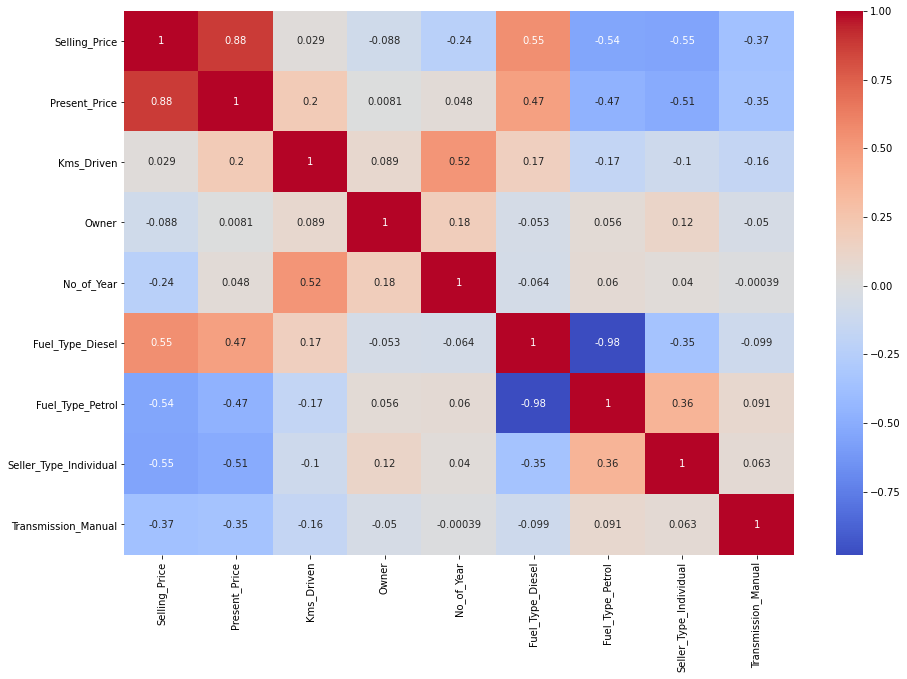

In [39]:
# Plotting Correlation using heatmap
plt.figure(figsize = (15,10))
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
# plot heatmap
g = sns.heatmap(final_dataset[corr_features].corr(), annot = True, cmap = 'coolwarm')   #annot=True mean to see the values

Right strip indicates the correlation between all the features dark red color and dark blue color
* dark red color indicates positive correlation
* dark blue color indicates negative correlation

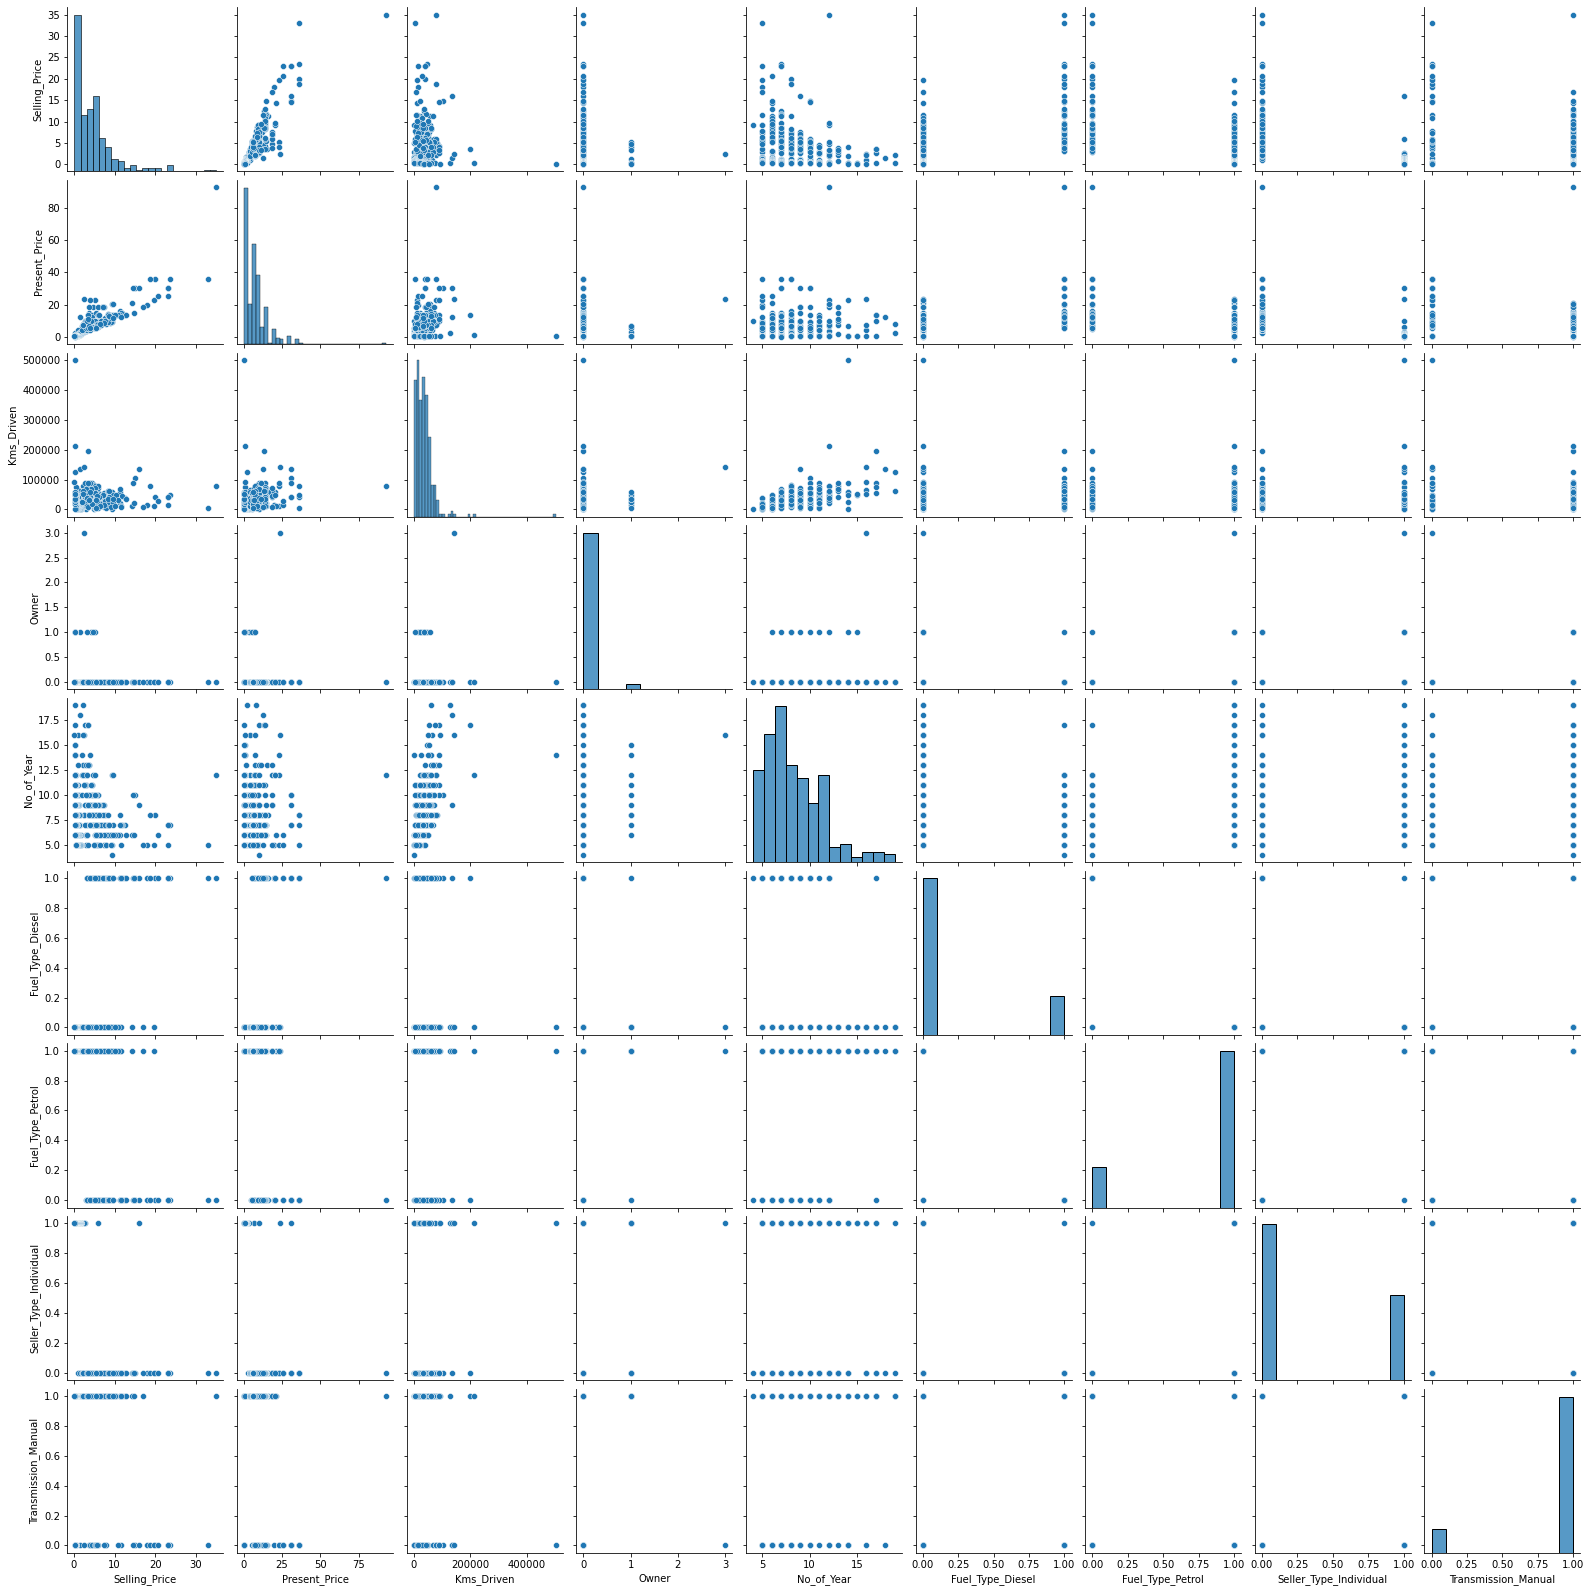

In [19]:
sns.pairplot(final_dataset)

In [20]:
# Creating independent and dependent features
X = final_dataset.iloc[:,1:]   # as 0 is my dependent features so I am starting from 1 till end
y = final_dataset.iloc[:,0] 

In [21]:
X.head()

,Present_Price,Kms_Driven,Owner,No_of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [22]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [23]:
# Feature Importance
# Feature Importance is basically uses to understand which are the importance features in dataset
from sklearn.ensemble import ExtraTreesRegressor   # it is a regressor problem
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [24]:
print(model.feature_importances_)

[0.39575916 0.04302567 0.00047353 0.07893271 0.21753604 0.00717465
 0.12870683 0.12839142]


### It is giving importance to all the features from higher to lower of the X features

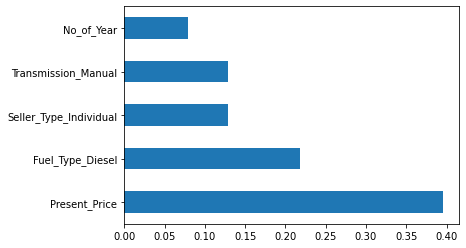

In [25]:
# plot graph of feature importances for better visualization
feature_imp = pd.Series(model.feature_importances_, index = X.columns)
feature_imp.nlargest(5).plot(kind = 'barh')
plt.show()

### Present_Price is the most important feature than Fuel_Type_Diesel and so on.

In [40]:
# train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,  random_state=0)

In [41]:
print('X train is:',X_train.shape)
print('X test is:',X_test.shape)
print('y train is:',y_train.shape)
print('y test is:',y_test.shape)

X train is: (210, 8)
X test is: (91, 8)
y train is: (210,)
y test is: (91,)


## Implementing Random Forest Regressor
> In Random Forest I dont have to scale this values because Random Forest uses Decision Tree and usually in Decision Tree it is not required.

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [43]:
# Hyperparameters
# this n_estimators is basically called as decision trees & in n_estimators I am selecting different different no. of decision trees
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)                                       

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [44]:
# Randomized Search CV
# using Randomized Search CV i am performing a hyperparameter tuning to find out the best parameters(basically i am giving the range)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [45]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,           # here I am taking in the form of key-value pair
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [46]:
# Implementing RandomForestRegressor
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose=2, 
                               random_state=42, n_jobs=1)

In [47]:
# fitting my model
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.7s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.8s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [48]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [49]:
rf_random.best_score_

-4.067503564690549

In [50]:
# predicting on test
predictions = rf_random.predict(X_test)
predictions

array([ 7.218  ,  0.5283 ,  5.04711,  9.32963, 16.68693,  4.99447,
        3.3766 ,  0.77179,  4.57126,  4.53345,  3.1033 ,  0.87368,
        5.00716,  7.97526,  7.94403, 10.48581,  7.30556,  4.09247,
        0.50336,  1.46595,  3.82748,  4.52467,  5.4198 ,  9.53176,
        0.24575,  0.77394,  0.51892,  0.63774,  0.50481,  4.73904,
        5.0517 ,  5.8374 ,  0.49932,  8.88434,  3.51189,  1.20306,
        5.67535,  7.31998,  0.258  ,  9.18251,  9.34219, 19.5751 ,
        4.88424,  4.05493,  5.42785, 11.92132,  0.33516,  0.90097,
        5.0063 ,  8.30826,  7.57816,  3.62876,  4.6818 , 20.64171,
        1.09765,  1.0464 ,  0.4908 ,  2.69377,  3.671  ,  1.22131,
        3.94438,  8.92101,  3.17704, 21.10831,  4.20786,  5.5767 ,
       10.37855,  5.00745,  0.56019,  2.94142,  3.4769 ,  2.98999,
        0.66575,  5.4604 ,  0.78554,  2.83523,  0.51425,  9.21298,
        1.23163,  2.71562,  0.49005, 10.13265,  7.50231,  5.49892,
        5.1052 ,  0.93443,  6.24196,  5.9047 ,  0.47321,  4.97

C:\Users\Lester\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

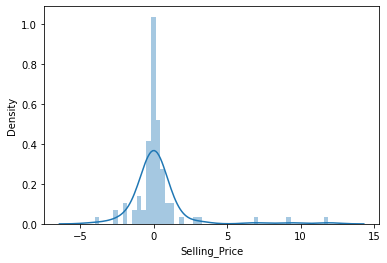

In [51]:
# here I am plotting y_test subtract with predictions
sns.distplot(y_test - predictions) 

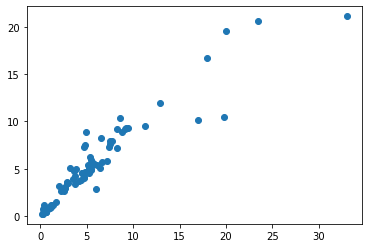

In [52]:
# plotting scatter plot
plt.scatter(y_test,predictions)

### our plot is linearly available that means our prediction is good

In [53]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8850148351648343
MSE: 3.926047192798907
RMSE: 1.9814255456107623


In [54]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)